# Projekt MSP2

__Autor:__

David Chocholatý, xchoch09

## Úloha 1 - Bayesovské odhady

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

- počet připojení za 1 ms popsaný 𝑋~𝑃𝑜(𝜆)
- expertní odhad: každých 5 ms by mělo nastat 10 připojení
- máme pozorování za dobu 100 ms


In [1]:
# Import knihoven.
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns

from matplotlib import cm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats._adnorm import normal_ad
from statsmodels.stats.stattools import durbin_watson

In [2]:
df_1 = pd.read_excel(open('Projekt-2_Data.xlsx', 'rb'), sheet_name='Úloha 1')
df_1

,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


In [3]:
OBSERVATIONS_COUNT = 100

observations = df_1['uloha_1 a)'][:OBSERVATIONS_COUNT]
observations = observations.astype('int64')
observations

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

#### Konjugované apriorní a aposteriorní rozdělení (expertní informace)

apriorní:
-----------
alfa: 10
beta: 5
aposteriorní:
-----------
alfa: 176
beta: 105


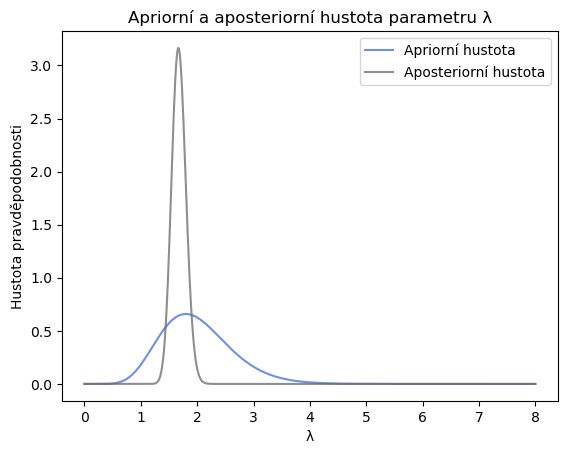

In [4]:
alpha_prior = 10
beta_prior = 5

alpha_posterior = alpha_prior + sum(observations)
beta_posterior = beta_prior + len(observations)

print('apriorní:')
print('-----------')
print('alfa: ' + str(alpha_prior))
print('beta: ' + str(beta_prior))
print('aposteriorní:')
print('-----------')
print('alfa: ' + str(alpha_posterior))
print('beta: ' + str(beta_posterior))

x = np.linspace(0, 8, 1000)

pdf_prior = stats.gamma.pdf(x, alpha_prior, scale=1/beta_prior)
pdf_posterior = stats.gamma.pdf(x, alpha_posterior, scale=1/beta_posterior)

fig, ax = plt.subplots(1, 1)
plt.title('Apriorní a aposteriorní hustota parametru λ')
ax.plot(x, pdf_prior, color='royalblue', label='Apriorní hustota', alpha=0.75)
ax.plot(x, pdf_posterior, color='dimgray', label='Aposteriorní hustota', alpha=0.75)
ax.legend(loc='best')
plt.xlabel('λ')
plt.ylabel('Hustota pravděpodobnosti')
plt.show()

#### Prediktivní rozdělení (pozorování)

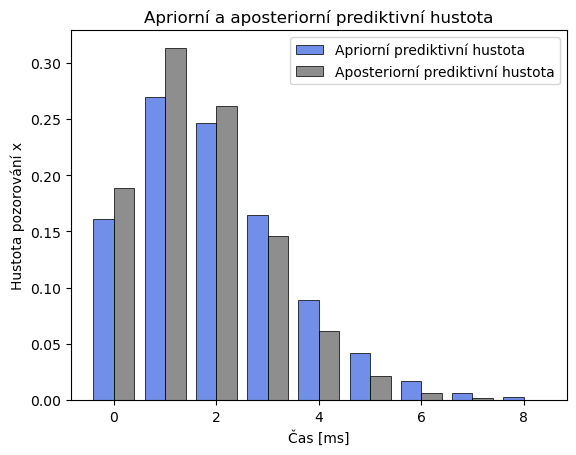

In [5]:
x = np.arange(0, 9)

pmf_prior = stats.nbinom.pmf(x, alpha_prior, beta_prior/(1 + beta_prior))
pmf_posterior = stats.nbinom.pmf(x, alpha_posterior, beta_posterior/(1 + beta_posterior))

fig, ax = plt.subplots(1, 1)
plt.title('Apriorní a aposteriorní prediktivní hustota')
# plt.plot(x, pmf_prior, 'o', color='royalblue', label='Apriorní prediktivní hustota')
plt.bar(x - 0.2, pmf_prior, width=0.4, color='royalblue', edgecolor = 'black', linewidth=0.7, label='Apriorní prediktivní hustota', alpha=0.75)
# plt.plot(x, pmf_posterior, 'o', color='dimgray', label='Aposteriorní prediktivní hustota')
plt.bar(x + 0.2, pmf_posterior, width=0.4, color='dimgray', edgecolor = 'black', linewidth=0.7, label='Aposteriorní prediktivní hustota', alpha=0.75)
ax.legend(loc='best')
plt.xlabel('Čas [ms]')
plt.ylabel('Hustota pozorování x')
plt.show()

#### 95% interval spolehlivosti

In [6]:
low_prior = stats.gamma.ppf(0.025, alpha_prior, scale=1/beta_prior)
high_prior = stats.gamma.ppf(0.975, alpha_prior, scale=1/beta_prior)

low_posterior = stats.gamma.ppf(0.025, alpha_posterior, scale=1/beta_posterior)
high_posterior = stats.gamma.ppf(0.975, alpha_posterior, scale=1/beta_posterior)

print("Apriorní:")
print(low_prior, high_prior)
print("Aposteriorní:")
print(low_posterior, high_posterior)
# TODO posterior

Apriorní:
0.9590777392264868 3.416960690283833
Aposteriorní:
1.4376938284869922 1.9327207471868797


In [7]:
mean = alpha_posterior / beta_posterior
median = stats.gamma.ppf(0.5, a=alpha_posterior, scale=1/beta_posterior)

print(mean, median)

1.6761904761904762 1.6730169441241727


In [8]:
mean_2_prior = stats.nbinom.mean(alpha_prior,  beta_prior / (beta_prior + 1))
mean_2_pos = stats.nbinom.mean(alpha_posterior,  beta_posterior / (beta_posterior + 1))

print("Apriorní:")
print(mean_2_prior)

print("Aposteriorní:")
print(mean_2_pos)

Apriorní:
1.9999999999999996
Aposteriorní:
1.6761904761904758


#### Aproximace diskrétním rozdělením

In [9]:
# Apriorní informace
MEASUREMENTS_COUNT = 100000
measured_vals_prior = df_1[['skupina', 'uloha_1 b)_prior']][:MEASUREMENTS_COUNT]
measured_vals_prior

,skupina,uloha_1 b)_prior
0,0,3.634785
1,0,2.868113
2,0,2.149160
3,0,4.263065
4,0,2.594745
...,...,...
99995,9999,1.725637
99996,9999,4.048414
99997,9999,3.000662
99998,9999,3.058451


In [10]:
# Rozdělení procesu
process_distribution = df_1['uloha_1 b)_pozorování'][:OBSERVATIONS_COUNT]
process_distribution

0     3.626656
1     3.008269
2     2.989829
3     2.371630
4     4.009366
        ...   
95    3.438933
96    3.430973
97    3.727306
98    4.257909
99    2.081679
Name: uloha_1 b)_pozorování, Length: 100, dtype: float64

In [11]:
# Parametr b
# measured_vals_prior['group'] = [i/10 for i in range(MEASUREMENTS_COUNT)]
#df['count_max'] = df.groupby(['Sp', 'Mt'])['count'].transform(max)
# measured_vals_prior
a = 1
mu = 3
sigma_sqr = 1
a_norm = (a - mu) / sigma_sqr

groups = measured_vals_prior.groupby('skupina')['uloha_1 b)_prior'].max()

hist, bins = np.histogram(groups, bins=50)
hist = hist / 10000

bins_centers = []

for j in range(1, len(bins)):
    b_j = (bins[j - 1] + bins[j]) / 2
    bins_centers.append(b_j)

divider_sum = 0

for i in range(len(bins)):
    b_j = (bins[i - 1] + bins[i]) / 2
    b_norm = (b_j - mu) / sigma_sqr
    divider_sum = divider_sum + np.prod([stats.truncnorm.pdf(data, a_norm, b_norm, mu, sigma_sqr) for data in process_distribution])
    
posterior = []
likelihoods = []
for i in range(1, len(bins)):
    b_j = (bins[i - 1] + bins[i]) / 2
    b_norm = (b_j - mu) / sigma_sqr
    likelihood = np.prod([stats.truncnorm.pdf(data, a_norm, b_norm, mu, sigma_sqr) for data in process_distribution])
    
    likelihoods.append(likelihood)
    posterior.append((likelihood * hist[i-1]) / divider_sum)

likelihoods = likelihoods/sum(likelihoods)
posterior = posterior/sum(posterior)

print(hist)

print(likelihoods)

print(posterior)

[0.0003 0.0003 0.0003 0.0011 0.002  0.0037 0.0047 0.0068 0.0091 0.0115
 0.016  0.0225 0.0241 0.0324 0.0387 0.037  0.0496 0.0477 0.0555 0.0581
 0.0565 0.0531 0.0533 0.0507 0.0516 0.0435 0.0412 0.0366 0.0311 0.0237
 0.0225 0.0203 0.0161 0.0153 0.0115 0.0098 0.0101 0.0061 0.0065 0.0043
 0.0036 0.0023 0.0027 0.0016 0.0013 0.001  0.001  0.0005 0.0004 0.0004]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06080918 0.05586125
 0.05226924 0.04963764 0.04769849 0.04626526 0.04520517 0.04442194
 0.04384474 0.04342097 0.04311131 0.04288626 0.04272366 0.04260695
 0.04252373 0.04246482 0.0424234  0.0423945  0.04237448 0.04236072
 0.04235133 0.04234497]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

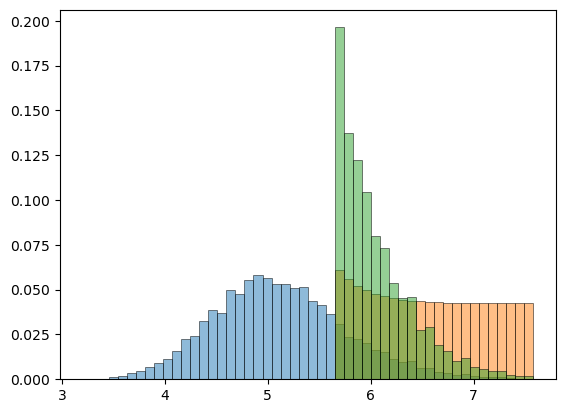

In [12]:


fig, ax = plt.subplots(1, 1)
# plt.title('Apriorní a aposteriorní prediktivní hustota')
# plt.plot(x, pmf_prior, 'o', color='royalblue', label='Apriorní prediktivní hustota')
# plt.plot(x, pmf_posterior, 'o', color='dimgray', label='Aposteriorní prediktivní hustota')
# ax.legend(loc='best')
# plt.xlabel('Čas [ms]')
# plt.ylabel('Hustota pozorování x')

# print(len(hist), len(bins_centers))

plt.bar(bins_centers, hist, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)
plt.bar(bins_centers, likelihoods, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)
plt.bar(bins_centers, posterior, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)

# ax.hist(groups, bins=50, edgecolor='black', linewidth=0.7, density=True)
# ax.bar(bins_centers, likelihoods, bins=22, edgecolor='black', linewidth=0.7, density=True)
plt.show()
# ax.hist(d["time"], label=conf, bins=200)

In [13]:
# Seřazení aposteriorní hustoty vzestupně
# sorted_posterior = np.sort(posterior)
# sorted_posterior = posterior
# Výpočet kumulativní distribuční funkce (CDF)
cdf = np.cumsum(posterior)

# Hledání hodnot na krajích 95% intervalu spolehlivosti
lower_bound = bins_centers[np.where(cdf >= 0.025)[0][0]]
upper_bound = bins_centers[np.where(cdf >= 0.975)[0][0]]

print("95% Interval spolehlivosti pro parametr b:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

95% Interval spolehlivosti pro parametr b:
Lower Bound: 5.693712028182375
Upper Bound: 7.008910628347767


In [14]:
# TODO 1a) 5. úkol - Bodový odhad se má dělat pomocí negativního binomického rozdělení
mean = sum(bins_centers * posterior)

median_index = np.where(cdf >= 0.5)[0][0]
median = bins_centers[median_index]

median

print(mean, median)

6.052771319832352 5.956751748215453


## Úloha 2 - Regrese

### 1) Určení regresního modelu pomocí zpětné eliminace
<em>Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).<em>
- <em>Zapište rovnici Vašeho finálního modelu.</em>
- <em>Diskutujte splnění předpokladů lineární regrese a základní regresní
diagnostiky.</em>
- <em>Pokud (až během regresního modelování) identifikujete některé „extrémně
odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém
zdůvodnění, vyřadit.</em>

#### Příprava dat

Načtení dat z xlsx souboru:

In [15]:
df_2 = pd.read_excel(open('Projekt-2_Data.xlsx', 'rb'), sheet_name='Úloha 2')
df_2 = df_2.rename(columns={'Ping [ms]' : 'Ping'})
df_2

,OSType,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,iOS,4113,0.8283,0.1717,47
1,iOS,7549,0.3461,0.6539,46
2,Windows,8855,0.2178,0.7822,55
3,Android,8870,0.0794,0.9206,56
4,MacOS,9559,0.7282,0.2718,76
...,...,...,...,...,...
497,iOS,5315,0.1974,0.8026,28
498,MacOS,1392,0.2373,0.7627,24
499,iOS,6014,0.8112,0.1888,54
500,Android,5118,0.2345,0.7655,39


Jeden z předpokladů regrese je nezávislost reziduí, která bude dále ověřena.

##### Nezávislost reziduí

Nyní je nutné ověřit závislost reziduí, tedy závislost jednotlivých sloupců ze vstupních dat. Závislost atributů bude ověřena pomocí VIF (z anglického Variance inflation factor). Pro VIF platí, že pokud je hodnota atributu větší než 10, vyplývá, že atribut je kolineární. Takový atribut bude rovnou vyřazen a nebude považován za možný vstup modelu.

In [16]:
X = df_2[["ActiveUsers", "InteractingPct", "ScrollingPct"]]
X = add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()

vif_df.columns = ['VIF']
vif_df

/home/david/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/david/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF
const,0.000000
ActiveUsers,1.001625
InteractingPct,inf
ScrollingPct,inf


In [17]:
X.corr()

,const,ActiveUsers,InteractingPct,ScrollingPct
const,NaN,NaN,NaN,NaN
ActiveUsers,NaN,1.000000,0.040275,-0.040275
InteractingPct,NaN,0.040275,1.000000,-1.000000
ScrollingPct,NaN,-0.040275,-1.000000,1.000000


Z výsledků VIF a korelační matice vyplývá, že atributy <em>InteractingPct</em> a <em>ScrollingPct</em> jsou vzájemně kolineární. Následně budou tyto dva atributy vyobrazeny ještě v grafu.

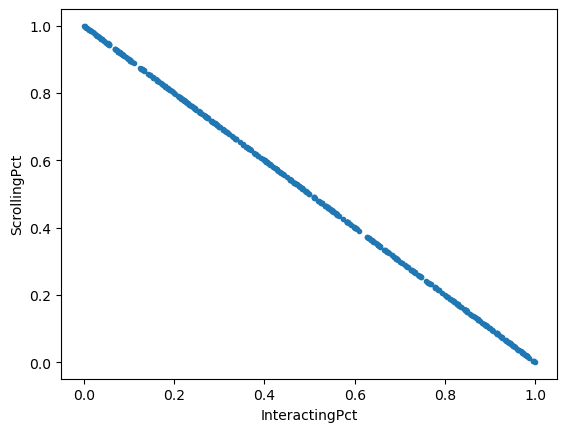

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

plt.scatter(df_2.InteractingPct, df_2.ScrollingPct, marker='.')
ax.set_xlabel('InteractingPct')
ax.set_ylabel('ScrollingPct')
plt.show()

Nyní je nutné pro vstup modelu ponechat pouze jeden z výše uvedených kolineárních atributů. Dále proto bude ve vstupu modelu ponechán pouze atribut <em>InteractingPct</em>.

Následně pro potřeby zpětné eliminace bude kategorický atribut <em>OSType</em> převeden na <em>kódování 1 z n</em> (z anglického <em>one-hot encoding</em>).

In [19]:
def one_hot_enc(df, column):
    if column in df:
        one_hot = pd.get_dummies(df[column], dtype=float)
        df = df.drop(column, axis = 1)
        return df.join(one_hot)

    return df

df_2 = one_hot_enc(df_2, 'OSType')
df_2

,ActiveUsers,InteractingPct,ScrollingPct,Ping,Android,MacOS,Windows,iOS
0,4113,0.8283,0.1717,47,0.0,0.0,0.0,1.0
1,7549,0.3461,0.6539,46,0.0,0.0,0.0,1.0
2,8855,0.2178,0.7822,55,0.0,0.0,1.0,0.0
3,8870,0.0794,0.9206,56,1.0,0.0,0.0,0.0
4,9559,0.7282,0.2718,76,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
497,5315,0.1974,0.8026,28,0.0,0.0,0.0,1.0
498,1392,0.2373,0.7627,24,0.0,1.0,0.0,0.0
499,6014,0.8112,0.1888,54,0.0,0.0,0.0,1.0
500,5118,0.2345,0.7655,39,1.0,0.0,0.0,0.0


Poté jsou přidány veškeré interakce druhého řádu, které budou následně použity pro vstup modelu. Manuální rozšíření dat o požadované sloupce oproti využití funkcí knihovny <em>statsmodels</em> je především vhodné pro následnou aplikaci zpětné eliminace.

In [20]:
def add_mul_column(df, first_col, second_col):
    new_col_name = first_col + '_' + second_col
    
    if new_col_name not in df:
        df.insert(loc=len(df.columns), column=new_col_name, value=df[first_col] * df[second_col])
        return df
    
    return df

df_2 = add_mul_column(df_2, 'ActiveUsers', 'InteractingPct')
df_2 = add_mul_column(df_2, 'ActiveUsers', 'MacOS')
df_2 = add_mul_column(df_2, 'ActiveUsers', 'Windows')
df_2 = add_mul_column(df_2, 'ActiveUsers', 'iOS')
df_2 = add_mul_column(df_2, 'InteractingPct', 'MacOS')
df_2 = add_mul_column(df_2, 'InteractingPct', 'Windows')
df_2 = add_mul_column(df_2, 'InteractingPct', 'iOS')

df_2 = add_mul_column(df_2, 'ActiveUsers', 'ActiveUsers')
df_2 = add_mul_column(df_2, 'InteractingPct', 'InteractingPct')

df_2

,ActiveUsers,InteractingPct,ScrollingPct,Ping,Android,MacOS,Windows,iOS,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS,InteractingPct_MacOS,InteractingPct_Windows,InteractingPct_iOS,ActiveUsers_ActiveUsers,InteractingPct_InteractingPct
0,4113,0.8283,0.1717,47,0.0,0.0,0.0,1.0,3406.7979,0.0,0.0,4113.0,0.0000,0.0000,0.8283,16916769,0.686081
1,7549,0.3461,0.6539,46,0.0,0.0,0.0,1.0,2612.7089,0.0,0.0,7549.0,0.0000,0.0000,0.3461,56987401,0.119785
2,8855,0.2178,0.7822,55,0.0,0.0,1.0,0.0,1928.6190,0.0,8855.0,0.0,0.0000,0.2178,0.0000,78411025,0.047437
3,8870,0.0794,0.9206,56,1.0,0.0,0.0,0.0,704.2780,0.0,0.0,0.0,0.0000,0.0000,0.0000,78676900,0.006304
4,9559,0.7282,0.2718,76,0.0,1.0,0.0,0.0,6960.8638,9559.0,0.0,0.0,0.7282,0.0000,0.0000,91374481,0.530275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,5315,0.1974,0.8026,28,0.0,0.0,0.0,1.0,1049.1810,0.0,0.0,5315.0,0.0000,0.0000,0.1974,28249225,0.038967
498,1392,0.2373,0.7627,24,0.0,1.0,0.0,0.0,330.3216,1392.0,0.0,0.0,0.2373,0.0000,0.0000,1937664,0.056311
499,6014,0.8112,0.1888,54,0.0,0.0,0.0,1.0,4878.5568,0.0,0.0,6014.0,0.0000,0.0000,0.8112,36168196,0.658045
500,5118,0.2345,0.7655,39,1.0,0.0,0.0,0.0,1200.1710,0.0,0.0,0.0,0.0000,0.0000,0.0000,26193924,0.054990


#### Vyobrazení původních dat:

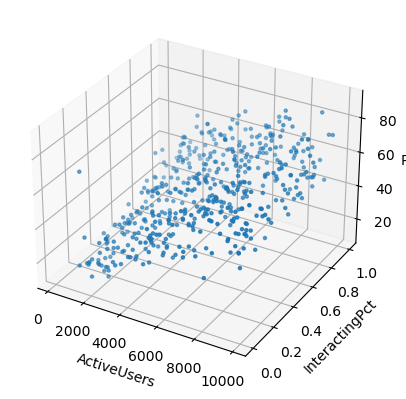

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

active_users_max = max(df_2.ActiveUsers)

x = np.arange(0, 10000, 100)
y = np.arange(0.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

# Vykreslení původních dat.
ax.scatter(df_2.ActiveUsers, df_2.InteractingPct, df_2.Ping, marker='.')

ax.set_xlabel('ActiveUsers')
ax.set_ylabel('InteractingPct')
ax.set_zlabel('Ping') # TODO vyobrazeni cropuje label
plt.show()

#### Definice plného modelu:

Dalším krokem po přípravě dat je samotná definice plného modelu, tedy modelu, který obsahuje veškeré smysluplné interakce druhého řádu. Na základě skutečnosti, že atributy <em>MacOS</em>, <em>Windows</em> a <em>iOS</em> vznikly pomocí kódování 1 z n z kategorického atributu <em>OSType</em>, nemá význam pro definici formule uvažovat jejich druhé mocniny. Následné atributy značeny s využitím znaku '\_' představují atributy, které vznikly násobením daných dvou atributů. Například atribut <em>ActiveUsers_InteractingPct</em> vznikl výpočtem ```ActiveUsers * InteractingPct``` s využitím dříve definované funkce ```add_mul_column()```.

In [22]:
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + MacOS + Windows + iOS + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'InteractingPct_MacOS + ' + \
    'InteractingPct_Windows + ' + \
    'InteractingPct_iOS + ' + \
    'ActiveUsers_ActiveUsers + ' + \
    'InteractingPct_InteractingPct'
full_model = smf.ols(formula=formula_definition, data=df_2)
full_model_fit = full_model.fit()
full_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        22:16:58   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3388      2.354     -0.144      0.886      -4.965       4.287
ActiveUsers                       0.0100      0.001     17.571      0.000       0.009       0.011
InteractingPct                   37.6062      4.567      8.234      0.000      28.633      46.580
MacOS                             2.0017      2.260      0.886      0.376      -2.440       6.443
Windows                           7.8174      2.217      3.526      0.000       3.461      12.174
iOS                              -0.0483      2.265     -0.021      0.983      -4.499       4.403
ActiveUsers_InteractingPct       -0.0031      0.000     -8.532      0.000      -0.004      -0.002
ActiveUsers_MacOS                 0.0014      0.000      4.536      0.000       0.001       0.002
ActiveUsers_Windows              -0.0008      0.000     -2.505      0.013      -0.001      -0.000
ActiveUsers_iOS                  -0.0011      0.000     -3.369      0.001      -0.002      -0.000
InteractingPct_MacOS             -0.3566      2.530     -0.141      0.888      -5.327       4.614
InteractingPct_Windows            0.4260      2.721      0.157      0.876      -4.919       5.771
InteractingPct_iOS                0.2678      2.691      0.100      0.921      -5.020       5.556
ActiveUsers_ActiveUsers        -4.17e-07    4.4e-08     -9.469      0.000   -5.03e-07    -3.3e-07
InteractingPct_InteractingPct    -3.7258      3.492     -1.067      0.287     -10.587       3.135
==============================================================================
Omnibus:                      228.442   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.488
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                     1.06e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Následně bude vypočítána hodnota VIF a také korelační matice pro jednotlivé prediktory.

In [23]:
X = pd.DataFrame(full_model.exog, columns=full_model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()

vif_df.columns = ['VIF']

vif_df

,VIF
Intercept,79.081437
ActiveUsers,30.108570
InteractingPct,26.021105
MacOS,14.530955
Windows,13.726080
iOS,13.164975
ActiveUsers_InteractingPct,8.851002
ActiveUsers_MacOS,10.454073
ActiveUsers_Windows,10.189613
ActiveUsers_iOS,9.061267


In [24]:
X.corr()

,Intercept,ActiveUsers,InteractingPct,MacOS,Windows,iOS,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS,InteractingPct_MacOS,InteractingPct_Windows,InteractingPct_iOS,ActiveUsers_ActiveUsers,InteractingPct_InteractingPct
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActiveUsers,NaN,1.000000,0.040275,-0.000136,0.003135,-0.063206,0.591746,0.243697,0.258029,0.189859,-0.004409,0.035105,-0.045884,0.977081,0.025793
InteractingPct,NaN,0.040275,1.000000,0.086466,-0.016964,-0.062634,0.752979,0.072359,0.010807,-0.050601,0.388633,0.248636,0.244987,0.033100,0.967446
MacOS,NaN,-0.000136,0.086466,1.000000,-0.371550,-0.341322,0.052512,0.881244,-0.325207,-0.296440,0.821075,-0.309767,-0.272791,-0.004621,0.108126
Windows,NaN,0.003135,-0.016964,-0.371550,1.000000,-0.334506,0.002608,-0.327426,0.875271,-0.290521,-0.305071,0.833716,-0.267344,0.009084,-0.042324
iOS,NaN,-0.063206,-0.062634,-0.341322,-0.334506,1.000000,-0.084945,-0.300788,-0.292783,0.868507,-0.280251,-0.278883,0.799219,-0.055587,-0.053518
ActiveUsers_InteractingPct,NaN,0.591746,0.752979,0.052512,0.002608,-0.084945,1.000000,0.193768,0.163826,0.053582,0.271050,0.210449,0.132465,0.576716,0.720732
ActiveUsers_MacOS,NaN,0.243697,0.072359,0.881244,-0.327426,-0.300788,0.193768,1.000000,-0.286586,-0.261236,0.719630,-0.272980,-0.240395,0.229636,0.086850
ActiveUsers_Windows,NaN,0.258029,0.010807,-0.325207,0.875271,-0.292783,0.163826,-0.286586,1.000000,-0.254284,-0.267019,0.759496,-0.233998,0.261283,-0.017146
ActiveUsers_iOS,NaN,0.189859,-0.050601,-0.296440,-0.290521,0.868507,0.053582,-0.261236,-0.254284,1.000000,-0.243400,-0.242212,0.698777,0.184717,-0.050135


Vyobrazení plného modelu:

Intercept                       -3.388459e-01
ActiveUsers                      1.002406e-02
InteractingPct                   3.760617e+01
MacOS                            2.001747e+00
Windows                          7.817378e+00
iOS                             -4.833230e-02
ActiveUsers_InteractingPct      -3.086297e-03
ActiveUsers_MacOS                1.397350e-03
ActiveUsers_Windows             -7.618681e-04
ActiveUsers_iOS                 -1.058353e-03
InteractingPct_MacOS            -3.565678e-01
InteractingPct_Windows           4.260464e-01
InteractingPct_iOS               2.678486e-01
ActiveUsers_ActiveUsers         -4.169698e-07
InteractingPct_InteractingPct   -3.725768e+00
dtype: float64


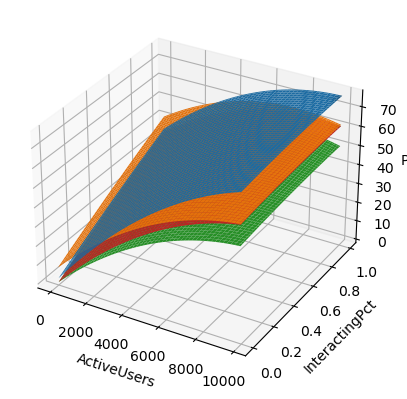

In [25]:
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')

active_users_max = max(df_2.ActiveUsers)

x = np.arange(0, 10000, 100)
y = np.arange(0.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

print(full_model_fit.params)

zs_macos = full_model_fit.params['Intercept'] + \
    full_model_fit.params['MacOS'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['ActiveUsers_MacOS'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['InteractingPct_MacOS'] * Y + \
    full_model_fit.params['ActiveUsers_InteractingPct'] * X * Y + \
    full_model_fit.params['ActiveUsers_ActiveUsers'] * X * X + \
    full_model_fit.params['InteractingPct_InteractingPct'] * Y * Y

zs_win = full_model_fit.params['Intercept'] + \
    full_model_fit.params['Windows'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['ActiveUsers_Windows'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['InteractingPct_Windows'] * Y + \
    full_model_fit.params['ActiveUsers_InteractingPct'] * X * Y + \
    full_model_fit.params['ActiveUsers_ActiveUsers'] * X * X + \
    full_model_fit.params['InteractingPct_InteractingPct'] * Y * Y

zs_ios = full_model_fit.params['Intercept'] + \
    full_model_fit.params['iOS'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['ActiveUsers_iOS'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['InteractingPct_iOS'] * Y + \
    full_model_fit.params['ActiveUsers_InteractingPct'] * X * Y + \
    full_model_fit.params['ActiveUsers_ActiveUsers'] * X * X + \
    full_model_fit.params['InteractingPct_InteractingPct'] * Y * Y

zs_android = full_model_fit.params['Intercept'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['ActiveUsers_InteractingPct'] * X * Y + \
    full_model_fit.params['ActiveUsers_ActiveUsers'] * X * X + \
    full_model_fit.params['InteractingPct_InteractingPct'] * Y * Y

Z_macos = zs_macos.reshape(X.shape)
Z_win = zs_win.reshape(X.shape)
Z_ios = zs_ios.reshape(X.shape)
Z_android = zs_android.reshape(X.shape)

ax.plot_surface(X, Y, Z_macos, label='MacOS')
ax.plot_surface(X, Y, Z_win, label='Windows')
ax.plot_surface(X, Y, Z_ios, label='iOS')
ax.plot_surface(X, Y, Z_android, label='Android')

# TODO legend
# ax.legend()
# ax.view_init(elev=20., azim=-35, roll=0)
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)

ax.set_xlabel('ActiveUsers')
ax.set_ylabel('InteractingPct')
ax.set_zlabel('Ping') # TODO vyobrazeni cropuje label
plt.show()

#### Získání výsledného modelu pomocí algoritmu zpětné eliminace:

Nyní bude z plného modelu dle jednotlivých kroků algoritmu zpětné eliminace vytvořen výsledný model. Algoritmus začíná tak, že nejprve musí být určena hladina významnosti, která bude definovat hladinu určující, zda daný prediktor zůstane v modelu dle jeho P-hodnoty. Pro účely projektu byla zvolena hladina 0.05. Algoritmus vychází z plného modelu, pro který byly uvedeny jeho výsledky včetně P-hodnot pro všechny prediktory. Následně započne cyklická část algoritmu, která pokračuje, dokud se v modelu nachází prediktor, pro který platí, že P-hodnota > 0.05:

- Je vybrán prediktor s největší P-hodnotou.
    - Pokud platí, že P-hodnota > 0.05, prediktor je odstraněn.
    - V opačném případě algoritmus končí a je vytvořen výsledný model.

__Odstranění prediktoru iOS:__

In [26]:
# Odstraneni iOS
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + MacOS + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'InteractingPct_MacOS + ' + \
    'InteractingPct_Windows + ' + \
    'InteractingPct_iOS + ' + \
    'ActiveUsers_ActiveUsers + ' + \
    'InteractingPct_InteractingPct'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     202.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          3.57e-187
Time:                        22:17:00   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3225.
Df Residuals:                     488   BIC:                             3284.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3714      1.793     -0.207      0.836      -3.894       3.151
ActiveUsers                       0.0100      0.001     18.742      0.000       0.009       0.011
InteractingPct                   37.6338      4.375      8.603      0.000      29.038      46.229
MacOS                             2.0290      1.863      1.089      0.277      -1.632       5.690
Windows                           7.8447      1.810      4.335      0.000       4.289      11.400
ActiveUsers_InteractingPct       -0.0031      0.000     -8.590      0.000      -0.004      -0.002
ActiveUsers_MacOS                 0.0014      0.000      5.017      0.000       0.001       0.002
ActiveUsers_Windows              -0.0008      0.000     -2.796      0.005      -0.001      -0.000
ActiveUsers_iOS                  -0.0011      0.000     -5.155      0.000      -0.001      -0.001
InteractingPct_MacOS             -0.3729      2.408     -0.155      0.877      -5.104       4.358
InteractingPct_Windows            0.4095      2.605      0.157      0.875      -4.709       5.528
InteractingPct_iOS                0.2368      2.262      0.105      0.917      -4.208       4.682
ActiveUsers_ActiveUsers       -4.171e-07   4.38e-08     -9.524      0.000   -5.03e-07   -3.31e-07
InteractingPct_InteractingPct    -3.7327      3.473     -1.075      0.283     -10.557       3.092
==============================================================================
Omnibus:                      228.481   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3153.673
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.853   Cond. No.                     9.61e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Odstranění prediktoru InteractingPct_iOS:__

In [27]:
# Odstraneni InteractingPct_iOS
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + MacOS + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'InteractingPct_MacOS + ' + \
    'InteractingPct_Windows + ' + \
    'ActiveUsers_ActiveUsers + ' + \
    'InteractingPct_InteractingPct'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     220.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          2.36e-188
Time:                        22:17:00   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3223.
Df Residuals:                     489   BIC:                             3278.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3703      1.791     -0.207      0.836      -3.889       3.149
ActiveUsers                       0.0100      0.001     19.067      0.000       0.009       0.011
InteractingPct                   37.7781      4.148      9.108      0.000      29.628      45.928
MacOS                             2.0221      1.860      1.087      0.278      -1.633       5.677
Windows                           7.8395      1.807      4.338      0.000       4.289      11.390
ActiveUsers_InteractingPct       -0.0031      0.000     -8.657      0.000      -0.004      -0.002
ActiveUsers_MacOS                 0.0014      0.000      5.392      0.000       0.001       0.002
ActiveUsers_Windows              -0.0008      0.000     -2.941      0.003      -0.001      -0.000
ActiveUsers_iOS                  -0.0010      0.000     -8.061      0.000      -0.001      -0.001
InteractingPct_MacOS             -0.4989      2.084     -0.239      0.811      -4.593       3.595
InteractingPct_Windows            0.2836      2.308      0.123      0.902      -4.252       4.819
ActiveUsers_ActiveUsers       -4.168e-07   4.37e-08     -9.539      0.000   -5.03e-07   -3.31e-07
InteractingPct_InteractingPct    -3.7301      3.470     -1.075      0.283     -10.547       3.087
==============================================================================
Omnibus:                      228.487   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3154.636
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.855   Cond. No.                     9.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Odstranění prediktoru InteractingPct_Windows:__

In [28]:
# Odstraneni InteractingPct_Windows
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + MacOS + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'InteractingPct_MacOS + ' + \
    'ActiveUsers_ActiveUsers + ' + \
    'InteractingPct_InteractingPct'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     240.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.50e-189
Time:                        22:17:00   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3221.
Df Residuals:                     490   BIC:                             3271.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.4127      1.756     -0.235      0.814      -3.862       3.037
ActiveUsers                       0.0100      0.001     19.086      0.000       0.009       0.011
InteractingPct                   37.8763      4.066      9.315      0.000      29.887      45.865
MacOS                             2.0635      1.828      1.129      0.259      -1.528       5.655
Windows                           7.9604      1.514      5.258      0.000       4.985      10.935
ActiveUsers_InteractingPct       -0.0031      0.000     -8.669      0.000      -0.004      -0.002
ActiveUsers_MacOS                 0.0014      0.000      5.401      0.000       0.001       0.002
ActiveUsers_Windows              -0.0008      0.000     -2.944      0.003      -0.001      -0.000
ActiveUsers_iOS                  -0.0010      0.000     -8.068      0.000      -0.001      -0.001
InteractingPct_MacOS             -0.5925      1.938     -0.306      0.760      -4.399       3.214
ActiveUsers_ActiveUsers       -4.168e-07   4.37e-08     -9.548      0.000   -5.03e-07   -3.31e-07
InteractingPct_InteractingPct    -3.7303      3.466     -1.076      0.282     -10.541       3.080
==============================================================================
Omnibus:                      228.480   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3153.948
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.853   Cond. No.                     9.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Odstranění prediktoru InteractingPct_MacOS:__

In [29]:
# Odstraneni InteractingPct_MacOS
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + MacOS + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'ActiveUsers_ActiveUsers + ' + \
    'InteractingPct_InteractingPct'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     265.2
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          9.41e-191
Time:                        22:17:00   Log-Likelihood:                -1598.5
No. Observations:                 502   AIC:                             3219.
Df Residuals:                     491   BIC:                             3265.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3369      1.736     -0.194      0.846      -3.749       3.075
ActiveUsers                       0.0100      0.001     19.112      0.000       0.009       0.011
InteractingPct                   37.7205      4.030      9.360      0.000      29.802      45.639
MacOS                             1.7623      1.538      1.146      0.252      -1.260       4.784
Windows                           7.9544      1.513      5.259      0.000       4.983      10.926
ActiveUsers_InteractingPct       -0.0031      0.000     -8.674      0.000      -0.004      -0.002
ActiveUsers_MacOS                 0.0014      0.000      5.404      0.000       0.001       0.002
ActiveUsers_Windows              -0.0008      0.000     -2.943      0.003      -0.001      -0.000
ActiveUsers_iOS                  -0.0010      0.000     -8.084      0.000      -0.001      -0.001
ActiveUsers_ActiveUsers        -4.17e-07   4.36e-08     -9.563      0.000   -5.03e-07   -3.31e-07
InteractingPct_InteractingPct    -3.7675      3.461     -1.089      0.277     -10.567       3.032
==============================================================================
Omnibus:                      229.699   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3207.912
Skew:                           1.611   Prob(JB):                         0.00
Kurtosis:                      14.958   Cond. No.                     9.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Odstranění prediktoru InteractingPct_InteractingPct:__

In [30]:
# Odstraneni InteractingPct_InteractingPct
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + MacOS + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'ActiveUsers_ActiveUsers'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     294.4
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          9.61e-192
Time:                        22:17:00   Log-Likelihood:                -1599.1
No. Observations:                 502   AIC:                             3218.
Df Residuals:                     492   BIC:                             3260.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2577      1.649      0.156      0.876      -2.981       3.497
ActiveUsers                    0.0100      0.001     19.101      0.000       0.009       0.011
InteractingPct                33.9892      2.120     16.030      0.000      29.823      38.155
MacOS                          1.6826      1.537      1.095      0.274      -1.337       4.702
Windows                        7.9718      1.513      5.270      0.000       5.000      10.944
ActiveUsers_InteractingPct    -0.0031      0.000     -8.677      0.000      -0.004      -0.002
ActiveUsers_MacOS              0.0014      0.000      5.430      0.000       0.001       0.002
ActiveUsers_Windows           -0.0007      0.000     -2.919      0.004      -0.001      -0.000
ActiveUsers_iOS               -0.0010      0.000     -8.079      0.000      -0.001      -0.001
ActiveUsers_ActiveUsers    -4.163e-07   4.36e-08     -9.547      0.000   -5.02e-07   -3.31e-07
==============================================================================
Omnibus:                      230.835   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3266.312
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      15.070   Cond. No.                     4.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Odstranění prediktoru MacOS:__

In [31]:
# Odstraneni MacOS
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS + ' + \
    'ActiveUsers_ActiveUsers'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     330.9
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          9.30e-193
Time:                        22:17:00   Log-Likelihood:                -1599.7
No. Observations:                 502   AIC:                             3217.
Df Residuals:                     493   BIC:                             3255.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7923      1.575      0.503      0.615      -2.302       3.887
ActiveUsers                    0.0099      0.001     19.167      0.000       0.009       0.011
InteractingPct                34.2568      2.107     16.262      0.000      30.118      38.396
Windows                        7.3575      1.405      5.236      0.000       4.597      10.118
ActiveUsers_InteractingPct    -0.0031      0.000     -8.832      0.000      -0.004      -0.002
ActiveUsers_MacOS              0.0017      0.000     13.603      0.000       0.001       0.002
ActiveUsers_Windows           -0.0007      0.000     -2.710      0.007      -0.001      -0.000
ActiveUsers_iOS               -0.0011      0.000     -8.118      0.000      -0.001      -0.001
ActiveUsers_ActiveUsers    -4.146e-07   4.36e-08     -9.511      0.000      -5e-07   -3.29e-07
==============================================================================
Omnibus:                      242.580   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3742.643
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                      15.937   Cond. No.                     4.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nyní po skončení algoritmu zpětné eliminace budou ještě vypočítány hodnoty VIF a korelační matice pro jednotlivé ponechané prediktory.

In [32]:
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']

vif_df

,VIF
Intercept,35.644330
ActiveUsers,24.981312
InteractingPct,5.576012
Windows,5.551936
ActiveUsers_InteractingPct,8.566008
ActiveUsers_MacOS,1.657555
ActiveUsers_Windows,6.474746
ActiveUsers_iOS,1.550683
ActiveUsers_ActiveUsers,22.204978


In [33]:
X.corr()

,Intercept,ActiveUsers,InteractingPct,Windows,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS,ActiveUsers_ActiveUsers
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActiveUsers,NaN,1.000000,0.040275,0.003135,0.591746,0.243697,0.258029,0.189859,0.977081
InteractingPct,NaN,0.040275,1.000000,-0.016964,0.752979,0.072359,0.010807,-0.050601,0.033100
Windows,NaN,0.003135,-0.016964,1.000000,0.002608,-0.327426,0.875271,-0.290521,0.009084
ActiveUsers_InteractingPct,NaN,0.591746,0.752979,0.002608,1.000000,0.193768,0.163826,0.053582,0.576716
ActiveUsers_MacOS,NaN,0.243697,0.072359,-0.327426,0.193768,1.000000,-0.286586,-0.261236,0.229636
ActiveUsers_Windows,NaN,0.258029,0.010807,0.875271,0.163826,-0.286586,1.000000,-0.254284,0.261283
ActiveUsers_iOS,NaN,0.189859,-0.050601,-0.290521,0.053582,-0.261236,-0.254284,1.000000,0.184717
ActiveUsers_ActiveUsers,NaN,0.977081,0.033100,0.009084,0.576716,0.229636,0.261283,0.184717,1.000000


Na základě hodnot VIF a i z korelační matice je možné určit, že prediktory <em>ActiveUsers</em> a <em>ActiveUsers_ActiveUsers</em> jsou vzájemně závislé. Proto bude ve výsledném modelu ponechán pouze jeden, a to <em>ActiveUsers</em>.

__Odstranění prediktoru ActiveUsers_ActiveUsers:__

In [34]:
# Odstraneni ActiveUsers_ActiveUsers
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     309.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          4.99e-176
Time:                        22:17:00   Log-Likelihood:                -1642.0
No. Observations:                 502   AIC:                             3300.
Df Residuals:                     494   BIC:                             3334.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.9196      1.357      7.309      0.000       7.253      12.586
ActiveUsers                    0.0055      0.000     22.743      0.000       0.005       0.006
InteractingPct                35.2710      2.286     15.426      0.000      30.779      39.763
Windows                        7.7665      1.526      5.088      0.000       4.767      10.766
ActiveUsers_InteractingPct    -0.0033      0.000     -8.504      0.000      -0.004      -0.003
ActiveUsers_MacOS              0.0017      0.000     12.726      0.000       0.001       0.002
ActiveUsers_Windows           -0.0007      0.000     -2.840      0.005      -0.001      -0.000
ActiveUsers_iOS               -0.0010      0.000     -7.445      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      123.688   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.242
Skew:                           0.959   Prob(JB):                    9.53e-145
Kurtosis:                       8.294   Cond. No.                     6.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Následně budou ještě jednou vypočítány hodnoty VIF a korelační matice.

In [35]:
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']

vif_df

,VIF
Intercept,22.411971
ActiveUsers,4.567019
InteractingPct,5.561726
Windows,5.546736
ActiveUsers_InteractingPct,8.550677
ActiveUsers_MacOS,1.656643
ActiveUsers_Windows,6.464752
ActiveUsers_iOS,1.550671


In [36]:
X.corr()

,Intercept,ActiveUsers,InteractingPct,Windows,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActiveUsers,NaN,1.000000,0.040275,0.003135,0.591746,0.243697,0.258029,0.189859
InteractingPct,NaN,0.040275,1.000000,-0.016964,0.752979,0.072359,0.010807,-0.050601
Windows,NaN,0.003135,-0.016964,1.000000,0.002608,-0.327426,0.875271,-0.290521
ActiveUsers_InteractingPct,NaN,0.591746,0.752979,0.002608,1.000000,0.193768,0.163826,0.053582
ActiveUsers_MacOS,NaN,0.243697,0.072359,-0.327426,0.193768,1.000000,-0.286586,-0.261236
ActiveUsers_Windows,NaN,0.258029,0.010807,0.875271,0.163826,-0.286586,1.000000,-0.254284
ActiveUsers_iOS,NaN,0.189859,-0.050601,-0.290521,0.053582,-0.261236,-0.254284,1.000000


Nyní již jsou hodnoty VIF v požadovaném rozsahu a je získán výsledný model dle algoritmu (ještě ovšem se nejedná o úplně konečný model, protože ještě bude nutné odstranin odlehlé hodnoty, jak bude následně provedeno).

Po odstranění prediktoru <em>ActiveUsers_ActiveUsers</em> se změnila hodnota <em>R-squared</em> z hodnoty ```0.843``` na hodnotu ```0.814```, ovšem i přes snížení této hodnoty lze argumentovat, že se zároveň snížila celková složitost modelu, a tedy může být daný krok eliminace prediktoru proveden.

Rovnice finálního modelu po aplikaci algoritmu je následující:

In [37]:
def get_reg_eq(model_fit):
    eq = f"y = {model_fit.params.Intercept:.6f}"

    for term in model_fit.params.index[1:]:
        eq += f" + {model_fit.params[term]:.6f} * {term}"
    
    print(f"Regression equation: {eq}")

get_reg_eq(model_fit)

Regression equation: y = 9.919642 + 0.005472 * ActiveUsers + 35.271023 * InteractingPct + 7.766522 * Windows + -0.003274 * ActiveUsers_InteractingPct + 0.001690 * ActiveUsers_MacOS + -0.000745 * ActiveUsers_Windows + -0.001048 * ActiveUsers_iOS


#### Ověřování linearity

In [ ]:
# TODO odsud dal textovy popis

In [38]:
new_col_name = 'prediction'
    
if new_col_name not in df_2:
    df_2.insert(loc=len(df_2.columns), column=new_col_name, value=model_fit.fittedvalues)

df_2['prediction']

0      46.177579
1      46.972684
2      60.914651
3      58.953590
4      81.274092
         ...    
497    36.963066
498    27.177504
499    49.166381
500    42.268240
501    53.911801
Name: prediction, Length: 502, dtype: float64

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


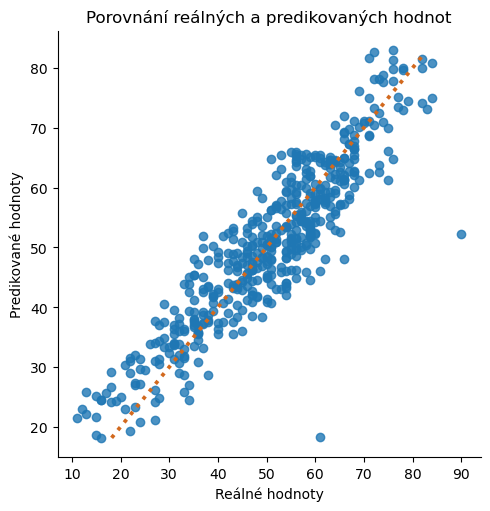

In [39]:
ax = sns.lmplot(x='Ping', y='prediction', data=df_2, fit_reg=False)

line_coordinates = np.arange(df_2['prediction'].min(), df_2['prediction'].max())
plt.plot(line_coordinates, line_coordinates, color='chocolate', linestyle='dotted', linewidth='2.7')

ax.set(title='Porovnání reálných a predikovaných hodnot', xlabel='Reálné hodnoty', ylabel='Predikované hodnoty')    

plt.show()

#### Rezidua

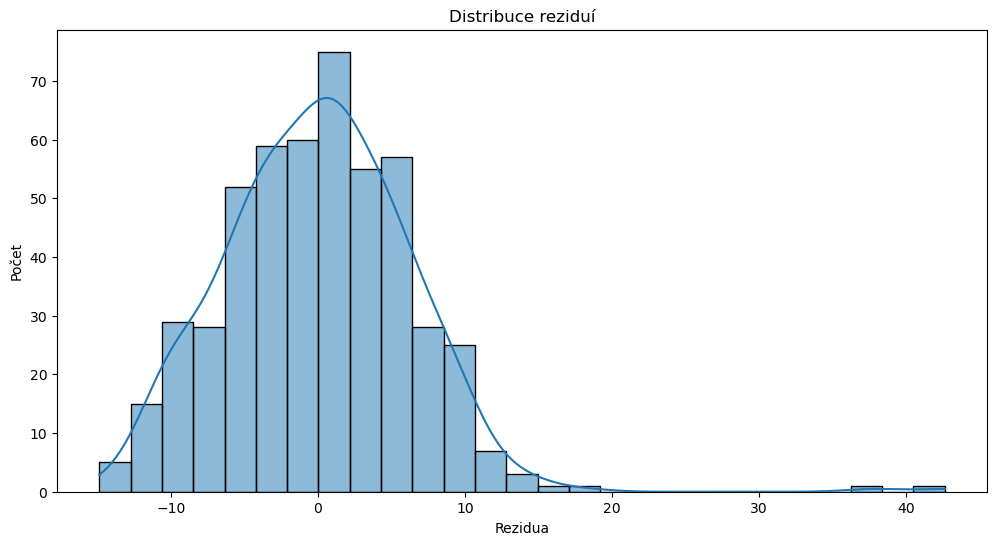

In [40]:
plt.subplots(figsize=(12, 6))

ax = sns.histplot(model_fit.resid, kde=True)
ax.set(title='Distribuce reziduí', xlabel='Rezidua', ylabel='Počet')

plt.show()

In [41]:
print(f"P-hodnota: {normal_ad(model_fit.resid)[1]}")

P-hodnota: 0.030169539168559602


In [42]:
try:
    if DATA_IS_LOADED:
        print("Info: data are not reloaded.")
except:
    df_2 = df_2.drop(df_2[model_fit.resid > 35].index).reset_index()

DATA_IS_LOADED = True
df_2

,index,ActiveUsers,InteractingPct,ScrollingPct,Ping,Android,MacOS,Windows,iOS,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS,InteractingPct_MacOS,InteractingPct_Windows,InteractingPct_iOS,ActiveUsers_ActiveUsers,InteractingPct_InteractingPct,prediction
0,0,4113,0.8283,0.1717,47,0.0,0.0,0.0,1.0,3406.7979,0.0,0.0,4113.0,0.0000,0.0000,0.8283,16916769,0.686081,46.177579
1,1,7549,0.3461,0.6539,46,0.0,0.0,0.0,1.0,2612.7089,0.0,0.0,7549.0,0.0000,0.0000,0.3461,56987401,0.119785,46.972684
2,2,8855,0.2178,0.7822,55,0.0,0.0,1.0,0.0,1928.6190,0.0,8855.0,0.0,0.0000,0.2178,0.0000,78411025,0.047437,60.914651
3,3,8870,0.0794,0.9206,56,1.0,0.0,0.0,0.0,704.2780,0.0,0.0,0.0,0.0000,0.0000,0.0000,78676900,0.006304,58.953590
4,4,9559,0.7282,0.2718,76,0.0,1.0,0.0,0.0,6960.8638,9559.0,0.0,0.0,0.7282,0.0000,0.0000,91374481,0.530275,81.274092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,497,5315,0.1974,0.8026,28,0.0,0.0,0.0,1.0,1049.1810,0.0,0.0,5315.0,0.0000,0.0000,0.1974,28249225,0.038967,36.963066
496,498,1392,0.2373,0.7627,24,0.0,1.0,0.0,0.0,330.3216,1392.0,0.0,0.0,0.2373,0.0000,0.0000,1937664,0.056311,27.177504
497,499,6014,0.8112,0.1888,54,0.0,0.0,0.0,1.0,4878.5568,0.0,0.0,6014.0,0.0000,0.0000,0.8112,36168196,0.658045,49.166381
498,500,5118,0.2345,0.7655,39,1.0,0.0,0.0,0.0,1200.1710,0.0,0.0,0.0,0.0000,0.0000,0.0000,26193924,0.054990,42.268240


In [43]:
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + Windows + ' + \
    'ActiveUsers_InteractingPct + ' + \
    'ActiveUsers_MacOS + ' + \
    'ActiveUsers_Windows + ' + \
    'ActiveUsers_iOS'
model = smf.ols(formula=formula_definition, data=df_2)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     374.2
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.71e-192
Time:                        22:17:01   Log-Likelihood:                -1592.3
No. Observations:                 500   AIC:                             3201.
Df Residuals:                     492   BIC:                             3234.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.5942      1.259      6.827      0.000       6.121      11.067
ActiveUsers                    0.0057      0.000     25.489      0.000       0.005       0.006
InteractingPct                36.6538      2.107     17.398      0.000      32.514      40.793
Windows                        8.1826      1.404      5.827      0.000       5.424      10.941
ActiveUsers_InteractingPct    -0.0035      0.000     -9.825      0.000      -0.004      -0.003
ActiveUsers_MacOS              0.0017      0.000     13.874      0.000       0.001       0.002
ActiveUsers_Windows           -0.0008      0.000     -3.513      0.000      -0.001      -0.000
ActiveUsers_iOS               -0.0010      0.000     -8.087      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.707   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.366
Skew:                           0.020   Prob(JB):                        0.186
Kurtosis:                       2.600   Cond. No.                     6.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']

vif_df

,VIF
Intercept,22.817977
ActiveUsers,4.598525
InteractingPct,5.601527
Windows,5.543347
ActiveUsers_InteractingPct,8.586170
ActiveUsers_MacOS,1.654880
ActiveUsers_Windows,6.455178
ActiveUsers_iOS,1.549256


In [45]:
X.corr()

,Intercept,ActiveUsers,InteractingPct,Windows,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActiveUsers,NaN,1.000000,0.036544,0.000596,0.590081,0.242860,0.257546,0.188768
InteractingPct,NaN,0.036544,1.000000,-0.018190,0.752473,0.071554,0.009830,-0.051566
Windows,NaN,0.000596,-0.018190,1.000000,0.001144,-0.327407,0.874629,-0.290542
ActiveUsers_InteractingPct,NaN,0.590081,0.752473,0.001144,1.000000,0.192962,0.163177,0.052500
ActiveUsers_MacOS,NaN,0.242860,0.071554,-0.327407,0.192962,1.000000,-0.286360,-0.262490
ActiveUsers_Windows,NaN,0.257546,0.009830,0.874629,0.163177,-0.286360,1.000000,-0.254117
ActiveUsers_iOS,NaN,0.188768,-0.051566,-0.290542,0.052500,-0.262490,-0.254117,1.000000


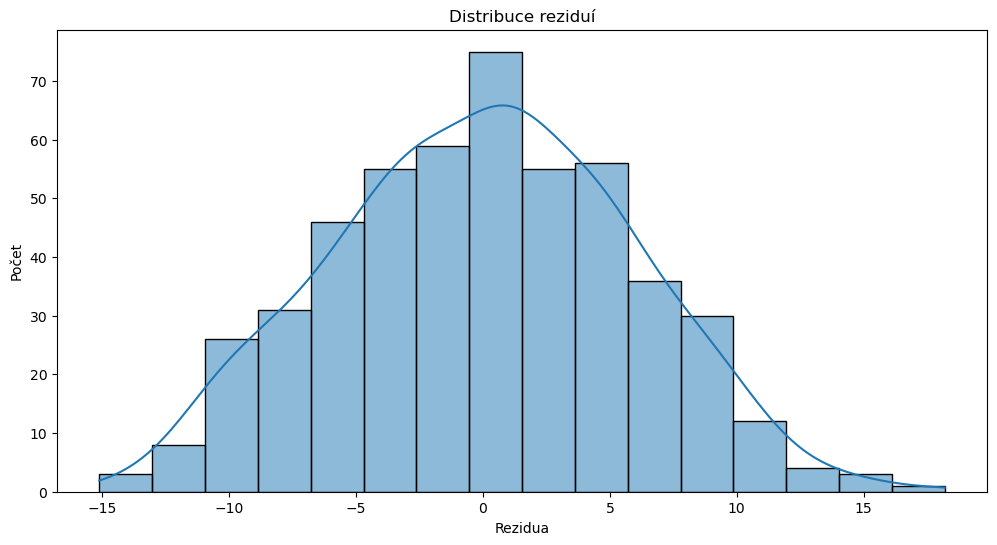

In [46]:
plt.subplots(figsize=(12, 6))

ax = sns.histplot(model_fit.resid, kde=True)
ax.set(title='Distribuce reziduí', xlabel='Rezidua', ylabel='Počet')

plt.show()

In [47]:
print(f"P-hodnota: {normal_ad(model_fit.resid)[1]}")

P-hodnota: 0.29993350780591116


In [48]:
get_reg_eq(model_fit)

Regression equation: y = 8.594192 + 0.005670 * ActiveUsers + 36.653788 * InteractingPct + 8.182555 * Windows + -0.003483 * ActiveUsers_InteractingPct + 0.001690 * ActiveUsers_MacOS + -0.000847 * ActiveUsers_Windows + -0.001044 * ActiveUsers_iOS


#### Ověřování nezávislosti chyb

In [49]:
print(f"Durbin-Watson: {durbin_watson(model_fit.resid)}")

Durbin-Watson: 1.913712036776804


#### Homoskedasticita

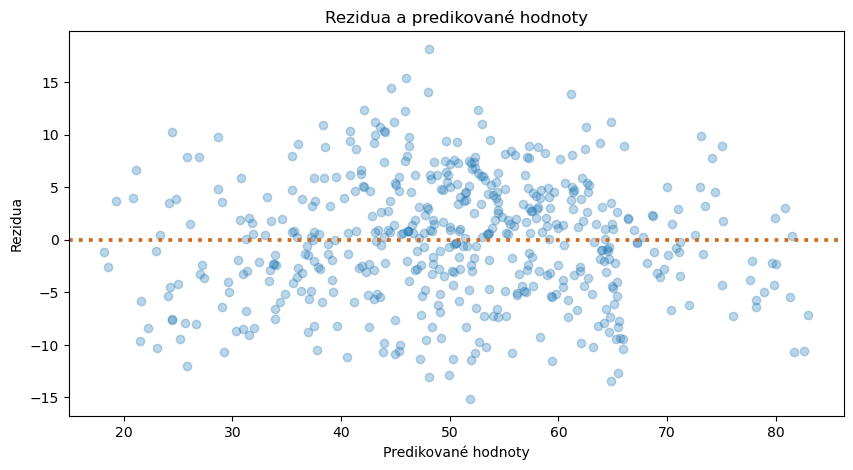

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.scatter(x=df_2['prediction'], y=model_fit.resid, alpha=0.3)
plt.axhline(y=0, color='chocolate', linestyle='dotted', linewidth='2.7')
ax.set(title='Rezidua a predikované hodnoty', xlabel='Predikované hodnoty', ylabel='Rezidua')
plt.show()

#### Vyobrazení výsledného modelu

Intercept                      8.594192
ActiveUsers                    0.005670
InteractingPct                36.653788
Windows                        8.182555
ActiveUsers_InteractingPct    -0.003483
ActiveUsers_MacOS              0.001690
ActiveUsers_Windows           -0.000847
ActiveUsers_iOS               -0.001044
dtype: float64


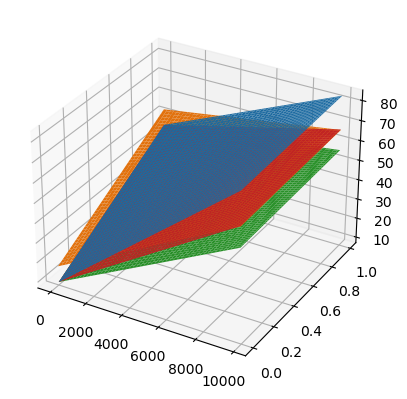

In [51]:
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')

# active_users_min = min(df_2.ActiveUsers)
active_users_max = max(df_2.ActiveUsers)

x = np.arange(0, 10000, 100)
y = np.arange(0.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

print(model_fit.params)

zs_macos = model_fit.params['Intercept'] + \
    model_fit.params['ActiveUsers'] * X + \
    model_fit.params['ActiveUsers_MacOS'] * X + \
    model_fit.params['InteractingPct'] * Y + \
    model_fit.params['ActiveUsers_InteractingPct'] * X * Y
    # model_fit.params['ActiveUsers_ActiveUsers'] * X * X
    # model_fit.params['InteractingPct_InteractingPct'] * Y * Y
    # model_fit.params['MacOS'] + \
    # model_fit.params['InteractingPct_MacOS'] * Y + \

zs_win = model_fit.params['Intercept'] + \
    model_fit.params['Windows'] + \
    model_fit.params['ActiveUsers'] * X + \
    model_fit.params['ActiveUsers_Windows'] * X + \
    model_fit.params['InteractingPct'] * Y + \
    model_fit.params['ActiveUsers_InteractingPct'] * X * Y
    # model_fit.params['ActiveUsers_ActiveUsers'] * X * X 
    # model_fit.params['InteractingPct_Windows'] * Y + \
    # model_fit.params['InteractingPct_InteractingPct'] * Y * Y

zs_ios = model_fit.params['Intercept'] + \
    model_fit.params['ActiveUsers'] * X + \
    model_fit.params['ActiveUsers_iOS'] * X + \
    model_fit.params['InteractingPct'] * Y + \
    model_fit.params['ActiveUsers_InteractingPct'] * X * Y
    # model_fit.params['ActiveUsers_ActiveUsers'] * X * X
    # model_fit.params['iOS'] + \
    # model_fit.params['InteractingPct_iOS'] * Y + \
    # model_fit.params['InteractingPct_InteractingPct'] * Y * Y

zs_android = model_fit.params['Intercept'] + \
    model_fit.params['ActiveUsers'] * X + \
    model_fit.params['InteractingPct'] * Y + \
    model_fit.params['ActiveUsers_InteractingPct'] * X * Y
    # model_fit.params['ActiveUsers_ActiveUsers'] * X * X
    # model_fit.params['InteractingPct_InteractingPct'] * Y * Y

Z_macos = zs_macos.reshape(X.shape)
Z_win = zs_win.reshape(X.shape)
Z_ios = zs_ios.reshape(X.shape)
Z_android = zs_android.reshape(X.shape)

ax.plot_surface(X, Y, Z_macos)
ax.plot_surface(X, Y, Z_win)
ax.plot_surface(X, Y, Z_ios)
ax.plot_surface(X, Y, Z_android)

# ax.legend()
# ax.view_init(elev=20., azim=-35, roll=0)
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)

#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
plt.show()

<em>2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má
odezva nejproblematičtější hodnotu.</em>

In [52]:
print(f"{df_2['prediction'].max()} ms")

df_2[df_2['prediction'] == df_2['prediction'].max()]

83.00823447853553 ms


,index,ActiveUsers,InteractingPct,ScrollingPct,Ping,Android,MacOS,Windows,iOS,ActiveUsers_InteractingPct,ActiveUsers_MacOS,ActiveUsers_Windows,ActiveUsers_iOS,InteractingPct_MacOS,InteractingPct_Windows,InteractingPct_iOS,ActiveUsers_ActiveUsers,InteractingPct_InteractingPct,prediction
227,227,9953,0.6729,0.3271,76,0.0,1.0,0.0,0.0,6697.3737,9953.0,0.0,0.0,0.6729,0.0,0.0,99062209,0.452794,83.008234


<em>3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních
parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.</em>

In [53]:
active_users_mean = df_2['ActiveUsers'].mean()
interacting_pct_mean = df_2['InteractingPct'].mean()

columns = {
    'ActiveUsers': active_users_mean,
    'InteractingPct': interacting_pct_mean,
    'Windows': 1.0,
    'ActiveUsers_InteractingPct': active_users_mean * interacting_pct_mean,
    'ActiveUsers_MacOS': active_users_mean * df_2['MacOS'],
    'ActiveUsers_Windows': active_users_mean * df_2['Windows'],
    'ActiveUsers_iOS': active_users_mean * df_2['iOS']
}

input_data = pd.DataFrame(columns, index=[0])

prediction = model_fit.get_prediction(input_data)

confidence_interval = model_fit.conf_int()
summary = prediction.summary_frame(alpha=0.05)

print(f"Bodový odhad: {prediction.predicted_mean[0]}")
print(f"Konfidenční interval: [{summary.mean_ci_lower[0]}, {summary.mean_ci_upper[0]}]")
print(f"Predikční interval: [{summary.obs_ci_lower[0]}, {summary.obs_ci_upper[0]}]")

Bodový odhad (mean): 50.76953097185954
Konfidenční interval: [47.933603916608426, 53.60545802711065]
Predikční interval: [38.849514338779244, 62.68954760493983]


<em>4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model
„vhodný“ pro další použití.</em>